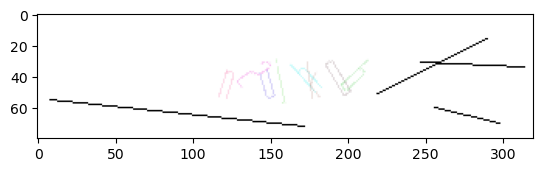

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
training_pth = "./train"
testing_pth = "./test"

sample_pth = "./train/00hgi3n7-0.png"
hard_pth = "./train/n2ujhk0b-0.png"

img = cv2.imread(hard_pth)
#img = cv2.imread(hard_pth)
show(img)

In [58]:
#IMPAINTING

# lower_black = np.array([0, 0, 0])
# upper_black = np.array([50, 50, 50])  # Adjust as needed based on line intensity

# # Convert the image to a mask where black lines are white (255) and other areas are black (0)
# mask = cv2.inRange(img, lower_black, upper_black)

# # Step 2: Use inpainting to remove the black lines based on the mask
# # cv2.INPAINT_TELEA and cv2.INPAINT_NS are two methods for inpainting
# # TELEA is generally faster and works well for small, linear noise like lines
# img_inpainted = cv2.inpaint(img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# # Display results
# cv2.imshow("Original Image", img)
# cv2.imshow("Mask for Black Lines", mask)
# cv2.imshow("Inpainted Image", img_inpainted)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# img = img_inpainted




In [61]:
# REMOVE BLACK LINE AND MEDIAN FILTER ON THEM


# lower_black = np.array([0, 0, 0])
# upper_black = np.array([50, 50, 50])  # Define the range for black pixels
# mask = cv2.inRange(img, lower_black, upper_black)

# img[mask != 0] = [255, 255, 255]
# show(img)

# img_filtered = img.copy()
# # Apply a median filter to the original image
# median_filtered = cv2.medianBlur(img, ksize=3)
# # Use the mask to replace the pixels in the filtered image where black pixels were removed
# img_filtered[mask != 0] = median_filtered[mask != 0]
# # Show the final output
# show(img_filtered)

In [47]:

lower_black = np.array([0, 0, 0])
upper_black = np.array([50, 50, 50])  # Define the range for black pixels
mask = cv2.inRange(img, lower_black, upper_black)

img[mask != 0] = [255, 255, 255]
show(img)



In [48]:
def fill_sandwiched_pixels(img, mask):
    # Create a copy of the image to modify
    img_filled = img.copy()

    # Get image dimensions
    height, width, _ = img.shape

    # Iterate through all pixels
    for y in range(1, height - 1):  # Start from 1 and go to height-1 to avoid edges
        for x in range(1, width - 1):  # Start from 1 and go to width-1 to avoid edges
            if mask[y, x] != 0:  # Check if this pixel was originally black
                # Initialize variables to hold surrounding pixel values
                pixel_above = img[y - 1, x]
                pixel_below = img[y + 1, x]
                pixel_left = img[y, x - 1]
                pixel_right = img[y, x + 1]
                pixel_top_left = img[y - 1, x - 1]
                pixel_bottom_right = img[y + 1, x + 1]
                pixel_top_right = img[y - 1, x + 1]
                pixel_bottom_left = img[y + 1, x - 1]

                # Check the conditions for each pair of surrounding pixels
                # 1. Top and Bottom
                if np.all(pixel_above != [255, 255, 255]) and np.all(pixel_below != [255, 255, 255]):
                    new_pixel = pixel_above
                    img_filled[y, x] = new_pixel
                
                # 2. Left and Right
                elif np.all(pixel_left != [255, 255, 255]) and np.all(pixel_right != [255, 255, 255]):
                    new_pixel = pixel_right
                    img_filled[y, x] = new_pixel
                
                # 3. Top-Left and Bottom-Right
                elif np.all(pixel_top_left != [255, 255, 255]) and np.all(pixel_bottom_right != [255, 255, 255]):
                    new_pixel = pixel_top_left
                    img_filled[y, x] = new_pixel
                
                # 4. Top-Right and Bottom-Left
                elif np.all(pixel_top_right != [255, 255, 255]) and np.all(pixel_bottom_left != [255, 255, 255]):
                    new_pixel = pixel_bottom_left
                    img_filled[y, x] = new_pixel

    return img_filled

# Apply custom function to fill sandwiched pixels
img_filled = fill_sandwiched_pixels(img, mask)

# Show the final output
show(img_filled)

In [84]:
# # Create a copy of the filled image to replace pixels
# img_with_median = img_filled.copy()

# # Apply median blur to the img_filled image
# img_filled_blurred = cv2.medianBlur(img_filled, ksize=5)

# # Replace only the original black pixel locations in img_with_median with the blurred pixels
# img_with_median[mask != 0] = img_filled_blurred[mask != 0]

# # Show the final output
# show(img_with_median)

In [49]:
gray = cv2.cvtColor(img_filled,cv2.COLOR_BGR2GRAY)
show(gray)
gray

test = np.uint8(np.where(gray!=255,255,0))
show(test)


output = cv2.connectedComponentsWithStats(test,8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

In [36]:
connected_region_area = []
connected_pos=[]
for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	# print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	output = img.copy()
	connected_region_area.append((w*h))
	connected_pos.append([x,y,w,h])
	test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)	
	show(test_out)

In [37]:
connected_pos

[[0, 0, 320, 80],
 [154, 29, 1, 3],
 [186, 29, 28, 24],
 [129, 31, 25, 24],
 [163, 31, 21, 24],
 [155, 34, 6, 24],
 [117, 36, 10, 19]]

In [38]:
connected_region_area

[25600, 3, 672, 600, 504, 144, 190]

In [39]:
for  x,y,w,h in connected_pos:
    output= img.copy() 
    test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)	
    show(test_out)

In [40]:
selected_region = []
print(len(connected_region_area))
for i in range(len(connected_region_area)):
    if connected_region_area[i] > 100 and connected_region_area[i] < 600:
        selected_region.append(i)
selected_region

7


[4, 5, 6]

In [41]:
selected_connected_roi  = [connected_pos[i] for i in selected_region]

In [42]:
selected_connected_roi

[[163, 31, 21, 24], [155, 34, 6, 24], [117, 36, 10, 19]]

In [43]:
sorted_roi = sorted(selected_connected_roi, key=lambda x: x[0])

In [44]:
sorted_roi

[[117, 36, 10, 19], [155, 34, 6, 24], [163, 31, 21, 24]]

In [45]:
output = img.copy() 
for i in sorted_roi:
    (x,y,w,h) = i
    test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    show(test_out)

In [16]:
saved_part = []
pad = 3
for i in sorted_roi:
    (x,y,w,h) = i
    saved_part.append(img_filled[y-pad:y+h+pad,x-pad:x+w+pad])

In [18]:
for i in saved_part:
    show(i)